🔵 PROBLEM STATEMENT: You have been hired as a consultant to a bank in New York City. The bank has extensive data on their customer for the past 6 months. The marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customer into at least 3 distincitive groups. The sample of the dataset includes the following:


*   ✅ CUSTID: Identification of credit card holder

*   ✅ BALANCE: Balance amount left in customer's account to make purchase

*   ✅ PURCHASES: Amount of purchases made from account
*   ✅ ONEOFFPURCHASES: Maximum purchase amount done in one-go


*   ✅ INSTALLMENT_PURCHASES: Amount of purchase done in installment


*   ✅ CASH_ADVANCE: Cash in advance given by the user

*   ✅ PURCHASES_FREQUENCY: How often the purchases are being made, score between 0 and 1 (1 = frequently purchases | 0 = not frequently purchased)


*   ✅ ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchases | 0 = not frequently purchased)
*   ✅ PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done. ( 1 = frequently done | 0 = not frequently done)



*   ✅ CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid

*   ✅ CASH_ADVANCE_TRX: Number of transactions made with "Cash in Advance"
*   ✅ CREDIT_LIMIT: Limit of Credit Card for user

*   ✅ PAYMENTS: Amount of Payment done by the user
*   ✅ MINIMUM_PAYMENTS: Minimum amount of payments made by user


*   ✅ PRC_FULL_PAYMENT: Percent of full payment paid by user
*   ✅ TENURE: Tenure of credit card service for user




Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

🔴 Importing necessary librarires and datasets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
customerdata_df = pd.read_csv('/content/Marketing_data.csv')

In [3]:
customerdata_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
customerdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Satistical summary of all the columns

customerdata_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# Checking for the customer who made ONEOFF_PURCHASES of $40761

customerdata_df[customerdata_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
# Checking for the customer who made CASH_ADVANCE of $47137

customerdata_df[customerdata_df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


🟣 Dataset Visualization

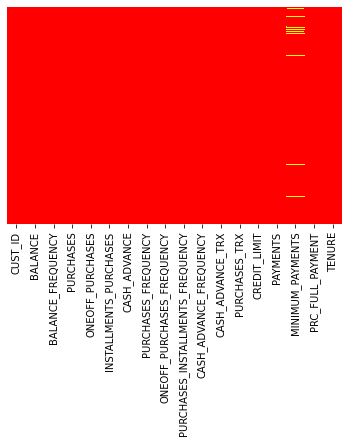

In [8]:
# Checking for missing data

sns.heatmap(customerdata_df.isnull(), yticklabels  = False, cbar = False, cmap = 'autumn')

In [9]:
customerdata_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Filling missing data with mean in CREDIT_LIMIT 

customerdata_df.loc[(customerdata_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = customerdata_df['CREDIT_LIMIT'].mean()

In [11]:
# Filling missing data with mean in MINIMUM_PAYMENTS

customerdata_df.loc[(customerdata_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = customerdata_df['MINIMUM_PAYMENTS'].mean()

In [12]:
customerdata_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# Checking for duplicate entries

customerdata_df.duplicated().sum()

0

In [14]:
# Droopping CUST_ID as it does not have any meaning

customerdata_df.drop('CUST_ID', axis = 1, inplace = True)

In [15]:
customerdata_df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
n = len(customerdata_df.columns)
n

17

In [17]:
customerdata_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

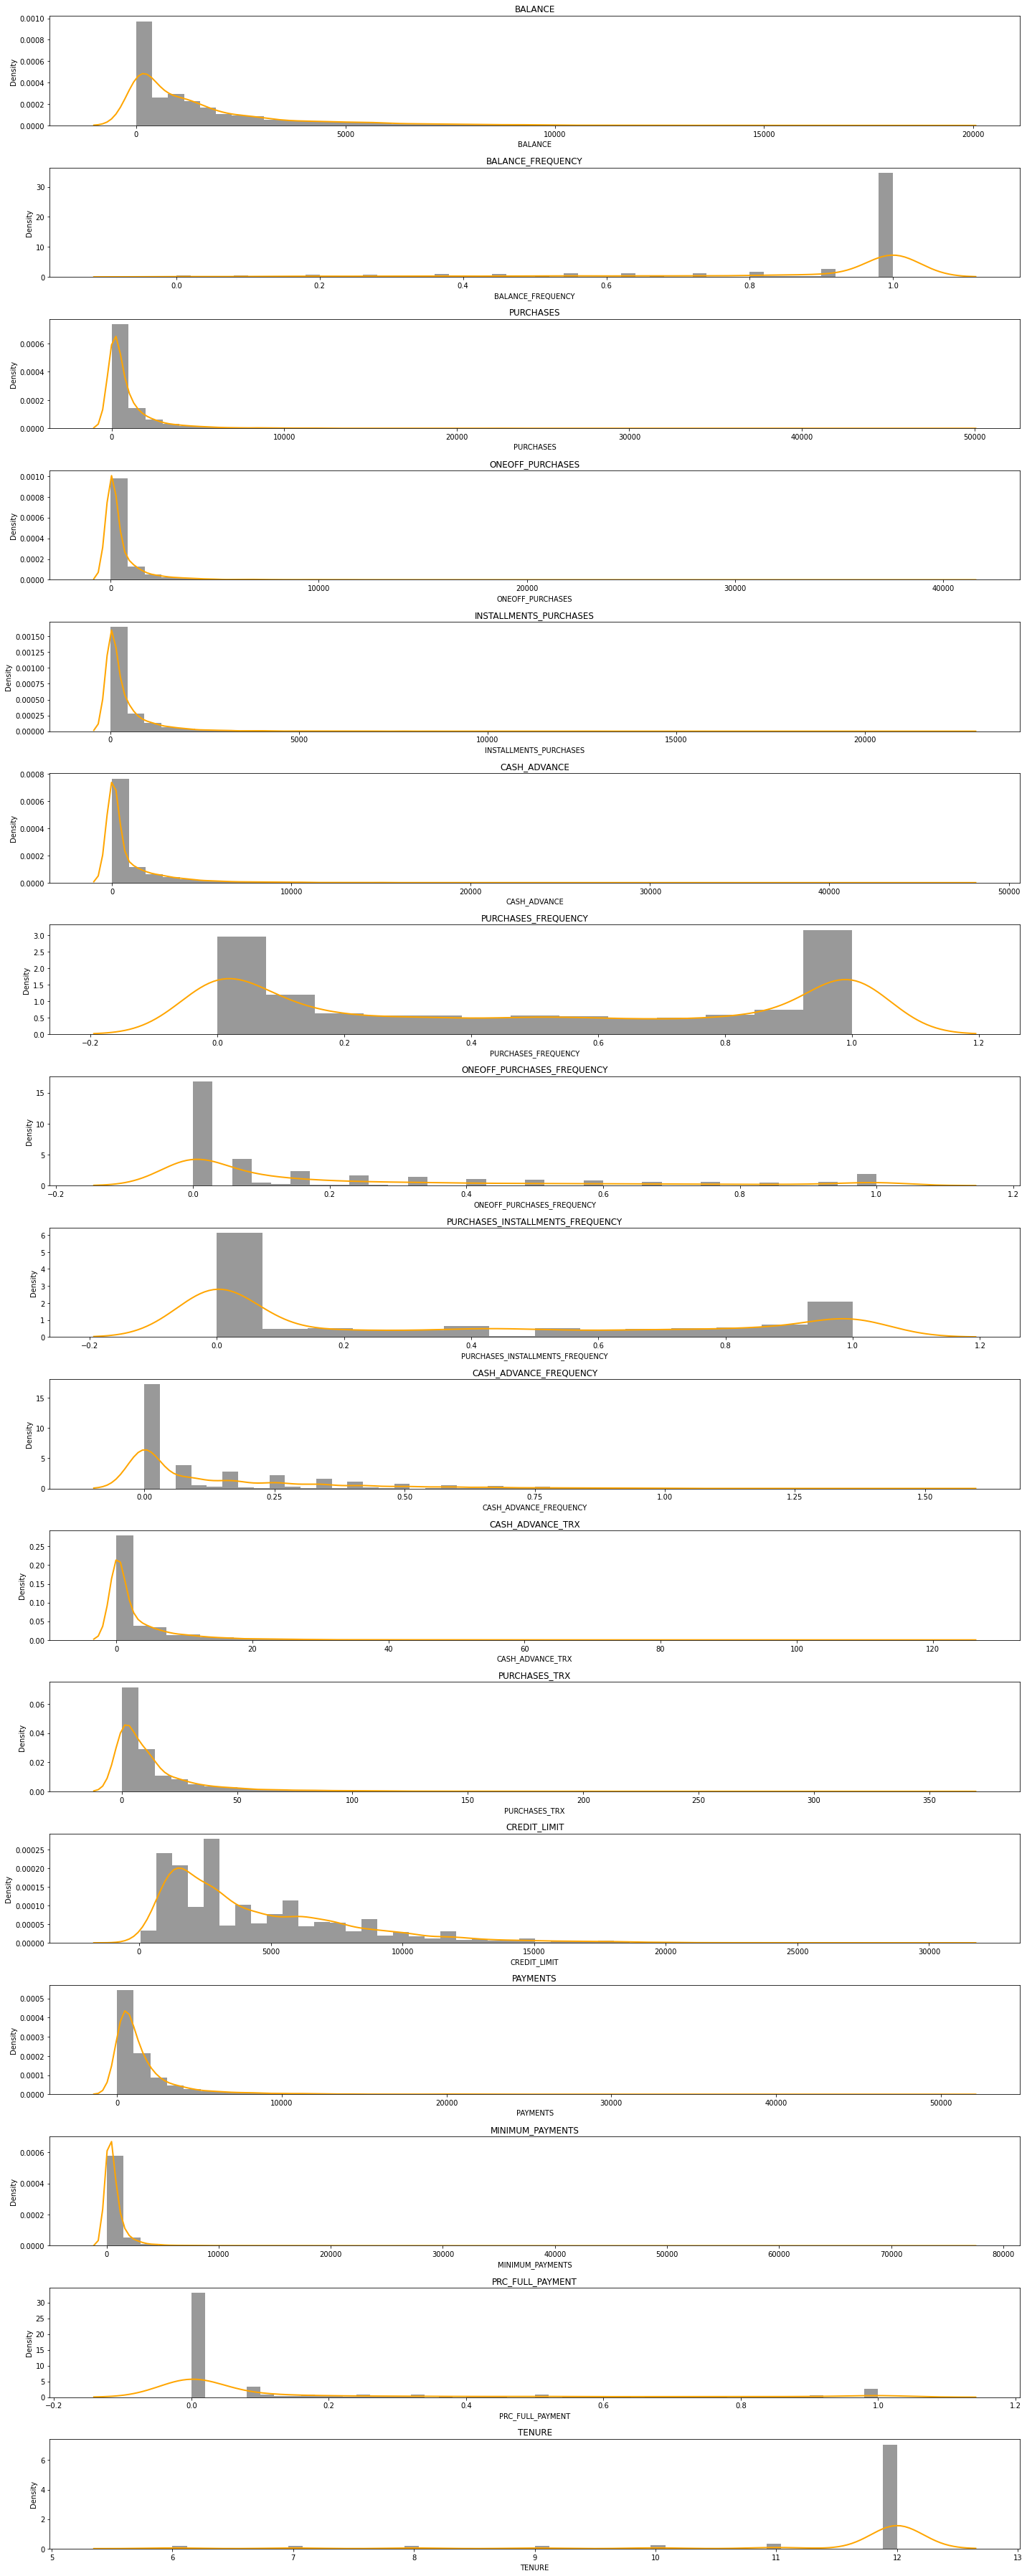

In [18]:
#distplot combines matplotlib.hist function with seaborn kdeplot()
plt.figure(figsize = (20, 50))
for i in range(len(customerdata_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(customerdata_df[customerdata_df.columns[i]], kde_kws = {'color': 'orange', 'lw': 2, 'label': 'KDE'}, hist_kws = {'color': 'black'})
  plt.title(customerdata_df.columns[i])

  plt.tight_layout()

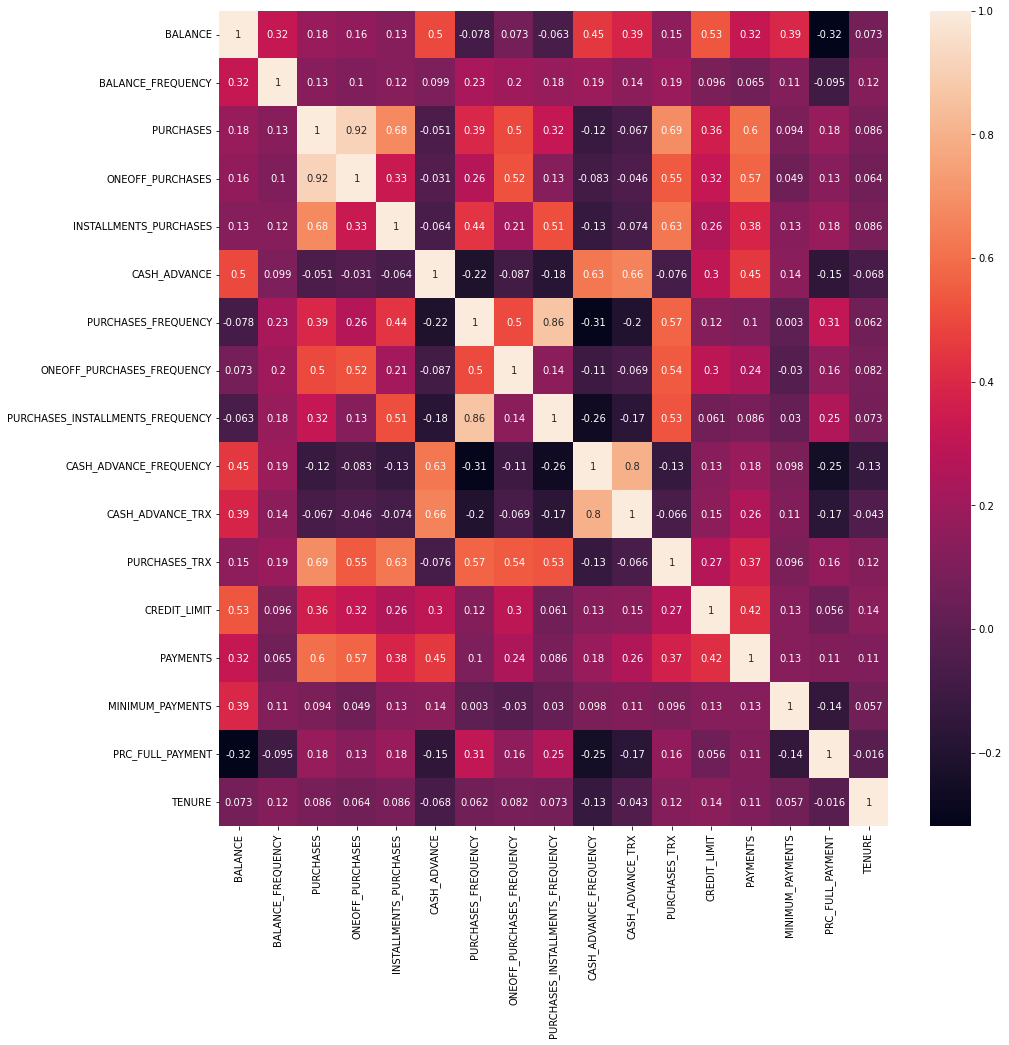

In [19]:
# Checking for correlation
correlations = customerdata_df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot = True)

🟠 Using Elbow Method to find the optimal number of clusters

In [20]:
# Scaling the data

scaler = StandardScaler()
customerdata_df_scaled = scaler.fit_transform(customerdata_df)

In [21]:
customerdata_df_scaled.shape

(8950, 17)

In [22]:
customerdata_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [23]:
score = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i )
  kmeans.fit(customerdata_df_scaled)
  score.append(kmeans.inertia_)

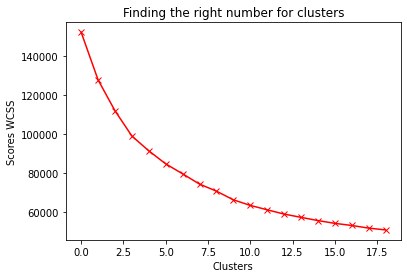

In [24]:
plt.plot(score, 'rx-')
plt.title("Finding the right number for clusters")
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

🔵 From the above figure we can see the elbow forming at the 4th cluster. As the values do not change linearly until 8th cluster. So we can choose the number of cluster as 8.

🟣 Applying K-Means Method 

In [25]:
kmeans = KMeans(8)
kmeans.fit(customerdata_df_scaled)
labels = kmeans.labels_

In [26]:
labels

array([0, 3, 7, ..., 6, 6, 6], dtype=int32)

In [27]:
kmeans.cluster_centers_.shape

(8, 17)

In [28]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [customerdata_df.columns])

In [29]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.005652,0.403512,-0.354625,-0.239418,-0.398544,-0.101687,-0.843325,-0.386414,-0.750910,0.089553,-0.037365,-0.478524,-0.308140,-0.252451,-0.013245,-0.454713,0.273741
1,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
2,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
3,1.667383,0.395293,-0.222737,-0.158982,-0.234647,1.990181,-0.484706,-0.216316,-0.423268,1.912103,1.911837,-0.273079,1.009211,0.794227,0.544153,-0.395980,0.073084
4,-0.700802,-2.141183,-0.309850,-0.234317,-0.302039,-0.320128,-0.554233,-0.440811,-0.439716,-0.521014,-0.376316,-0.418604,-0.173308,-0.191875,-0.256477,0.285369,0.200376
5,-0.358599,0.331884,-0.031011,-0.243105,0.373105,-0.363524,0.997546,-0.387603,1.210642,-0.472301,-0.359602,0.193970,-0.264576,-0.214410,-0.028477,0.317862,0.258461
6,-0.335299,-0.343331,-0.286174,-0.212445,-0.285997,0.068106,-0.197800,-0.282231,-0.221871,0.307838,-0.000061,-0.385450,-0.557656,-0.389819,-0.209480,0.011034,-3.191096
7,-0.119313,0.403580,0.558201,0.676702,0.076435,-0.331105,0.994476,1.900127,0.216436,-0.414998,-0.331983,0.654490,0.463427,0.159960,-0.155043,0.448357,0.273929


🟢 Applying K-Means Clustering to Perform Marketing Segmentation

In [30]:
# Performining inverse transformation to understand what these numbers mean

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [customerdata_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1576.239736,0.972859,245.543001,195.052907,50.669464,765.628639,0.151884,0.087183,0.066007,0.153065,2.993838,2.815513,3373.311586,1002.323159,833.339540,0.020719,11.883653
1,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
2,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
3,5034.992615,0.970912,527.324187,328.559391,198.879549,5152.373788,0.295815,0.137926,0.196220,0.517776,16.295711,7.922122,8166.370819,4032.353671,2132.332039,0.037897,11.615124
4,105.815587,0.370044,341.205363,203.518742,137.937297,307.546906,0.267910,0.070955,0.189683,0.030884,0.680743,4.304899,3863.884666,1177.685781,266.498413,0.237180,11.785473
5,818.082169,0.955891,936.949071,188.933470,748.461573,216.543997,0.890714,0.086828,0.845578,0.040632,0.794808,19.531203,3531.812382,1112.447453,797.841350,0.246684,11.863205
6,866.577846,0.795939,391.788710,239.822659,152.443758,1121.692389,0.410964,0.118263,0.276260,0.196746,3.248408,5.128981,2465.468869,604.656010,376.021606,0.156942,7.246815
7,1316.133891,0.972875,2195.810281,1715.623738,480.186544,284.529417,0.889482,0.769302,0.450455,0.052099,0.983289,30.978012,6180.586871,2196.212234,502.884798,0.284851,11.883905


In [70]:
cluster_centers.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2373.911815,0.872984,4890.822931,3622.257664,1268.976099,1191.471911,0.596158,0.349456,0.449762,0.139043,3.643638,36.701659,6623.284636,5506.976587,1315.062503,0.216156,11.269736
std,2078.154803,0.212377,9542.865834,7672.330928,1959.929531,1634.752478,0.344004,0.347735,0.317491,0.164352,5.205928,47.945201,4532.981776,9190.219232,1123.515377,0.155495,1.628980
min,105.815587,0.370044,245.543001,188.933470,50.669464,216.543997,0.151884,0.070955,0.066007,0.030884,0.680743,2.815513,2465.468869,604.656010,266.498413,0.020719,7.246815
25%,854.453927,0.915903,379.142873,201.402283,148.817143,301.792534,0.288839,0.087094,0.194586,0.040438,0.936169,4.922960,3492.187183,1084.916380,471.169000,0.127181,11.742886
50%,1446.186814,0.963519,732.136629,284.191025,339.533046,739.489161,0.650223,0.128095,0.363357,0.066692,2.076153,13.726663,5022.235769,1686.949007,815.590445,0.233421,11.873429
75%,4127.686375,0.972863,3289.709507,2224.776819,1266.593505,1008.005950,0.894304,0.698717,0.742916,0.163985,3.057481,46.912297,8465.119023,4566.398753,2165.715035,0.256226,11.891190
max,5448.201718,0.989229,27916.555652,22354.314348,5562.241304,5152.373788,0.957424,0.850000,0.865202,0.517776,16.295711,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.966667


🟠 From the above data we are able to divide the customers in to 4 different groups they are:


* First customers cluster (Transactors): These customers pay least amount of intrerest charges and careful with their money, Cluster with lowest balance (104) and cash advance (303) , Percentage of full payment = 23%


* Second customers cluster (revolvers) These customers use credit card as a loan (most lucrative sector): highest balance (5000) and cash advance (~5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)

* Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits



* Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 




In [31]:
labels.shape

(8950,)

In [32]:
labels.max()

7

In [33]:
labels.min()

0

In [34]:
# Concatinate labels with original dataframe

customerdata_df_cluster = pd.concat([customerdata_df, pd.DataFrame({'cluster' : labels})], axis = 1)
customerdata_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


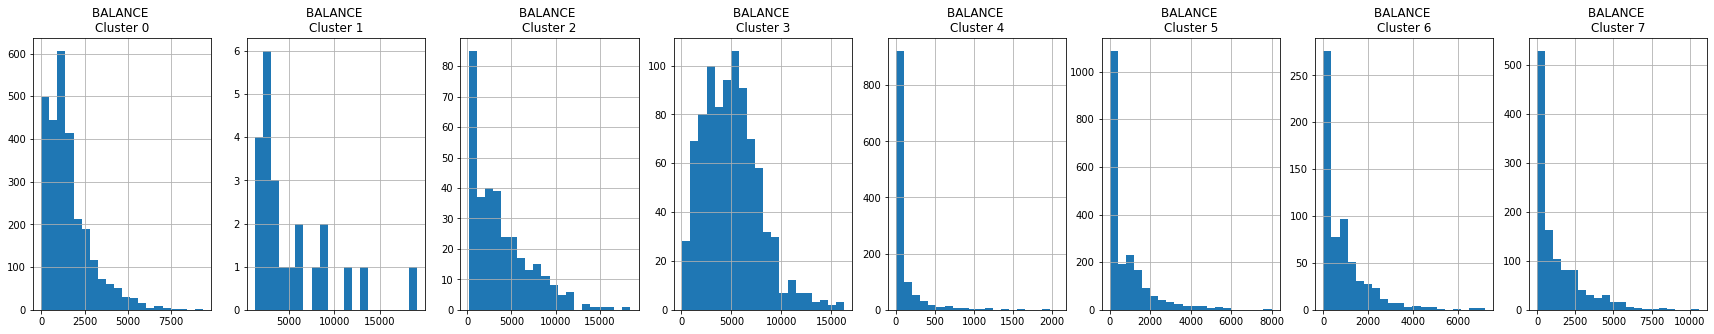

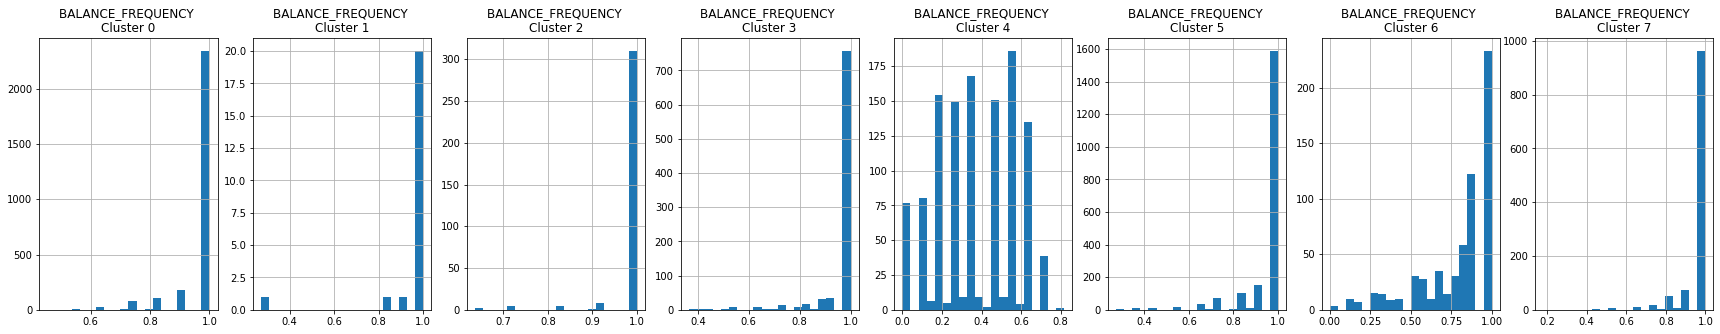

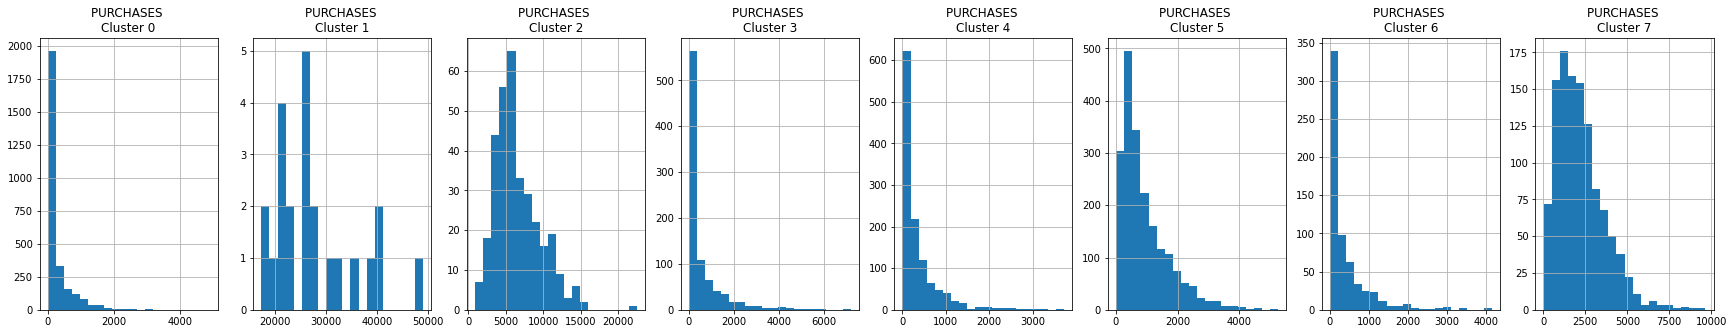

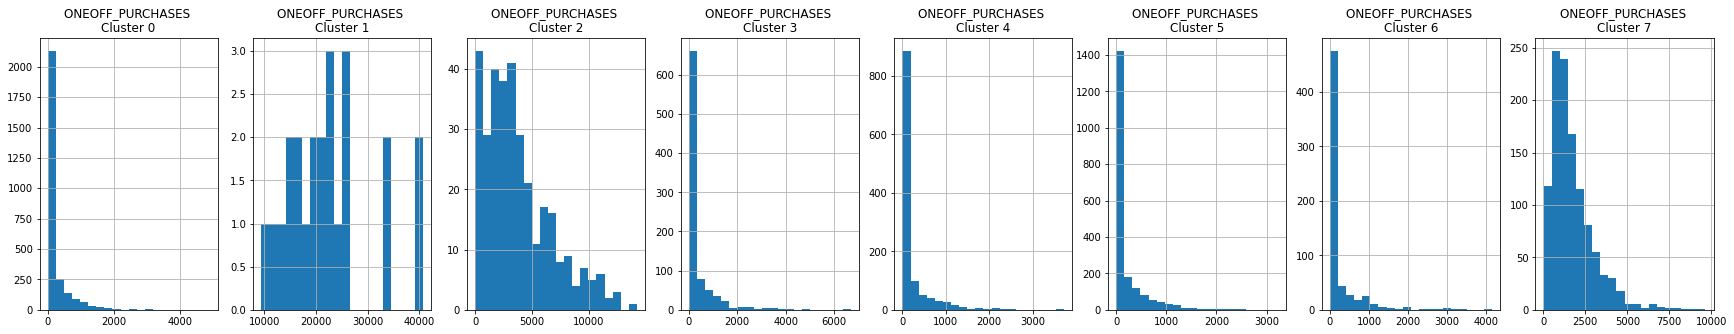

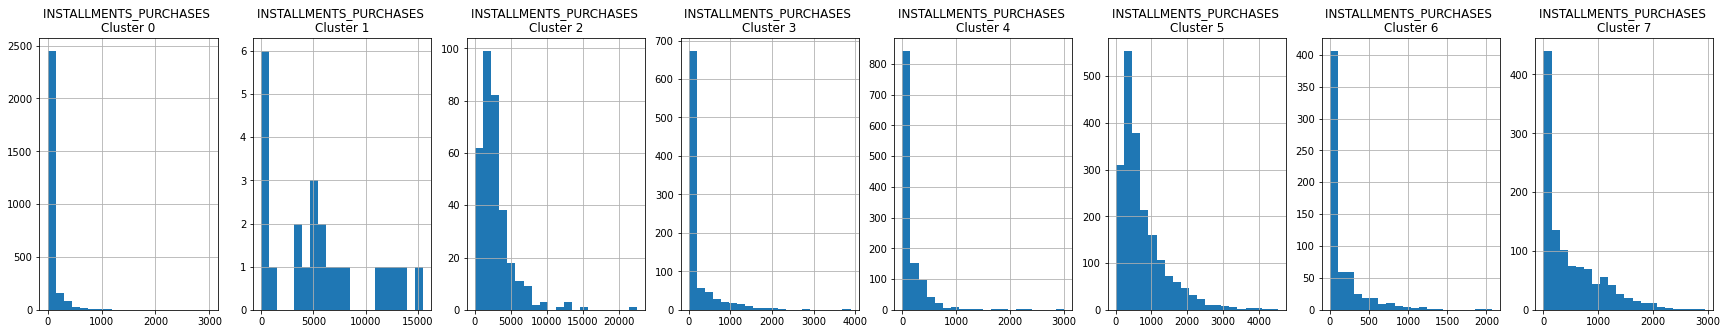

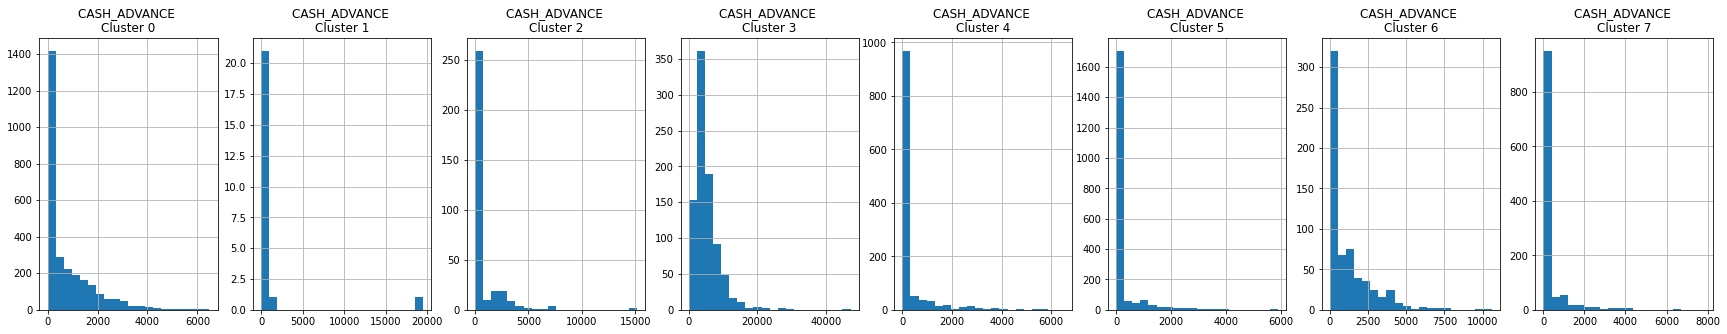

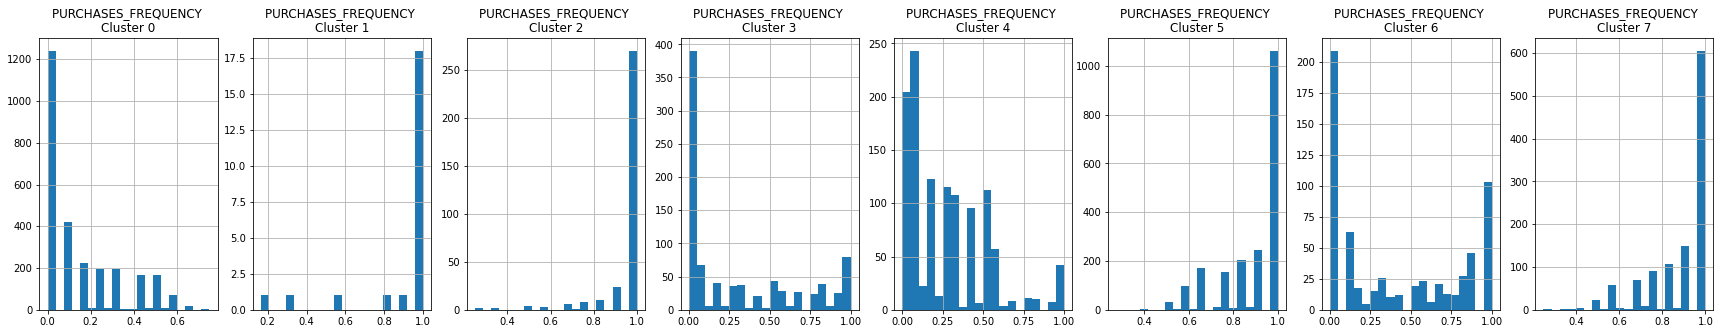

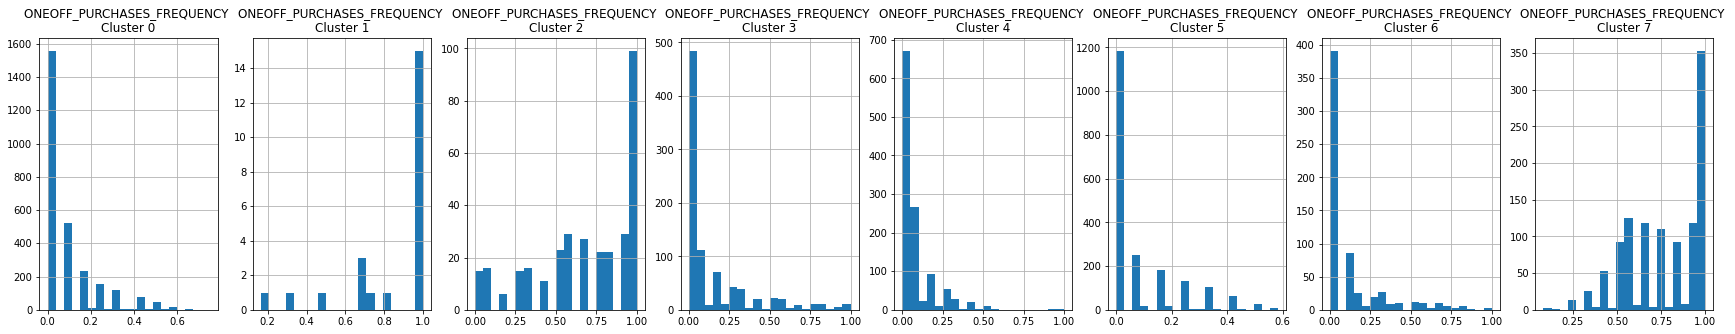

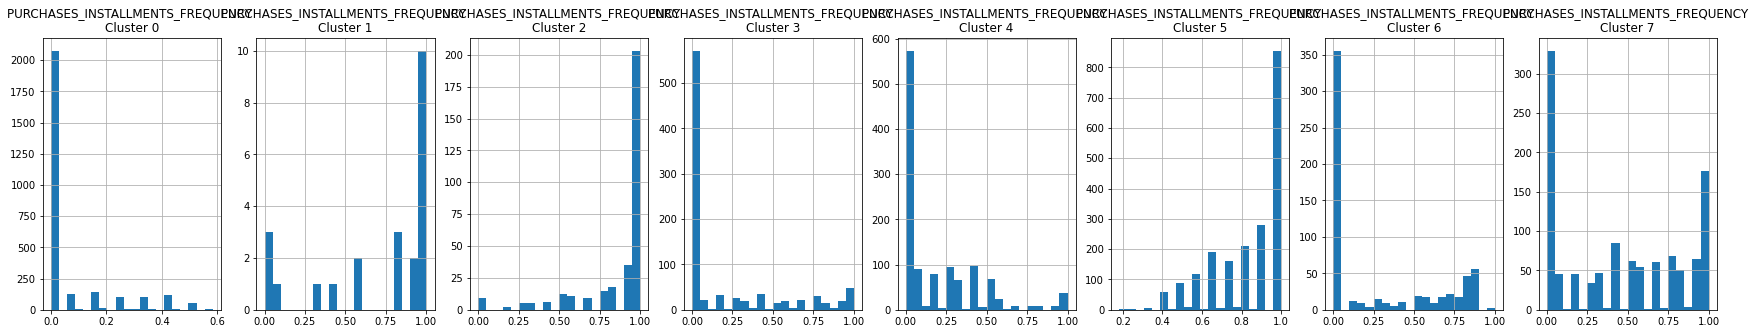

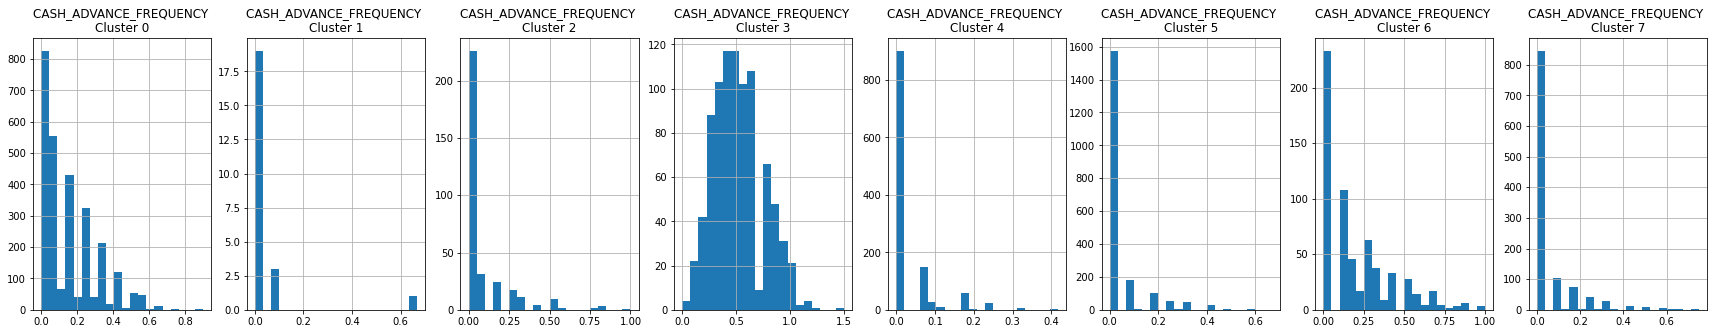

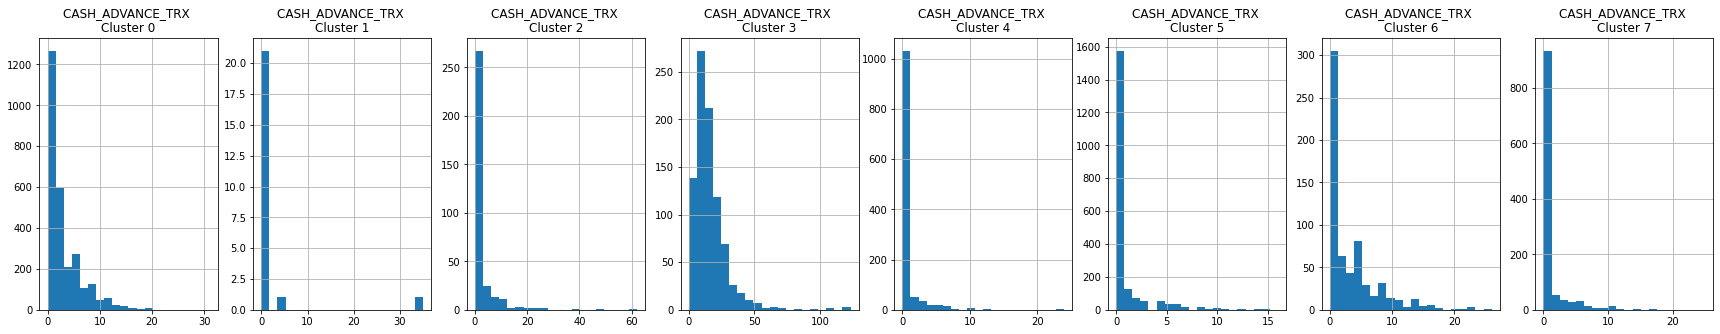

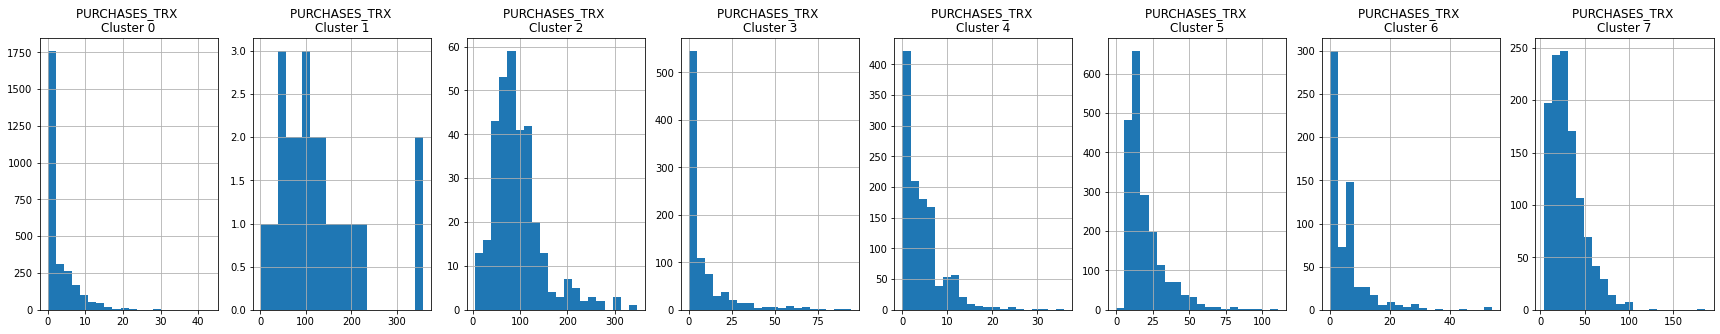

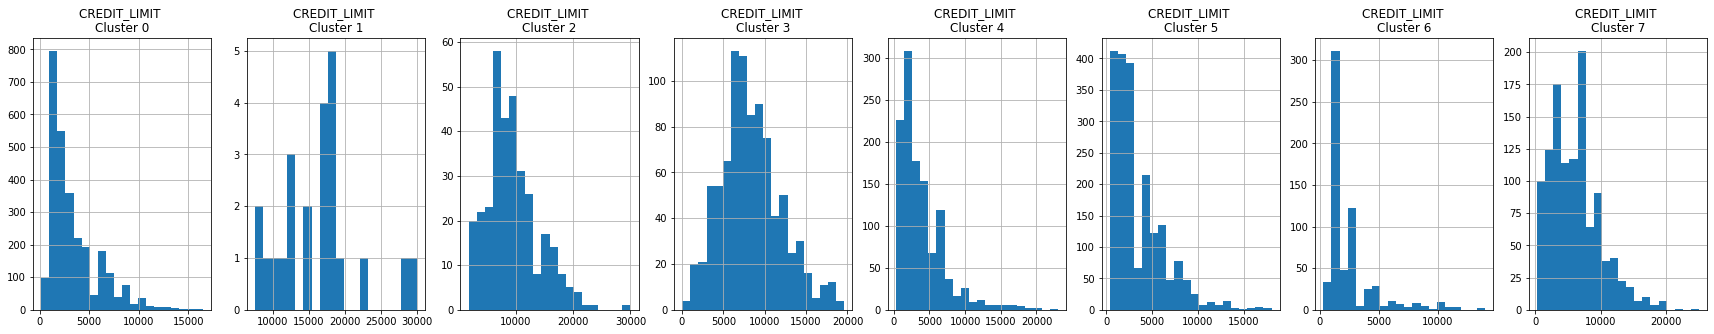

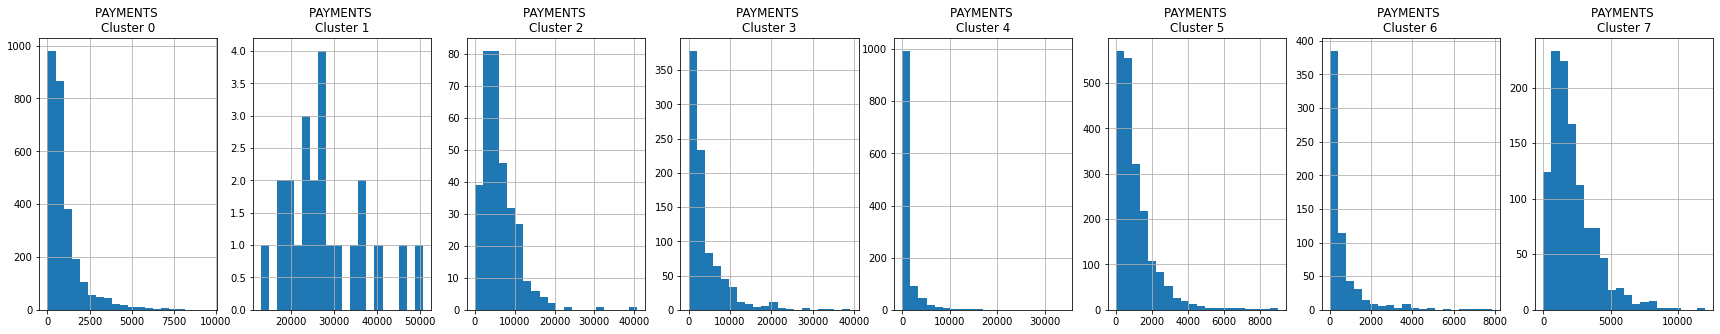

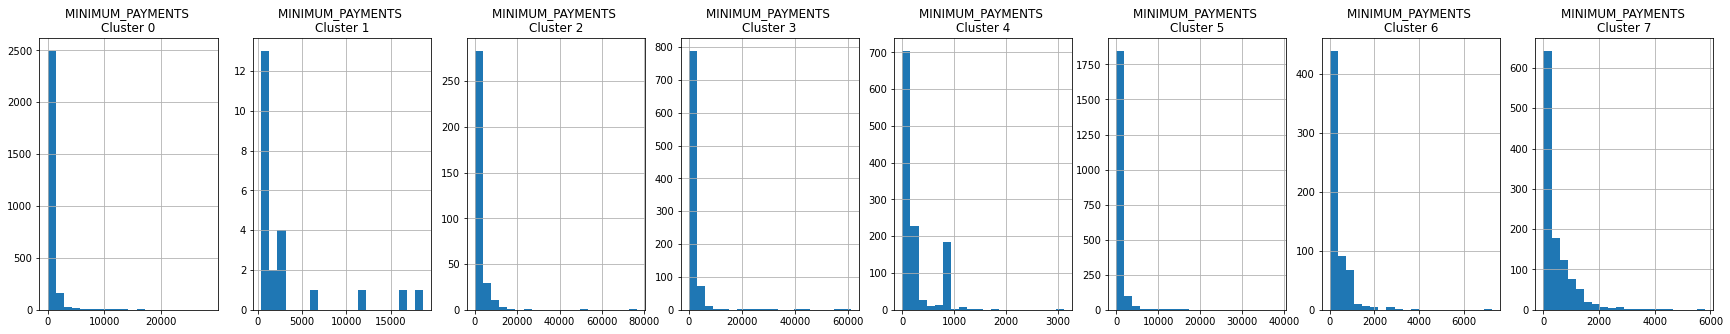

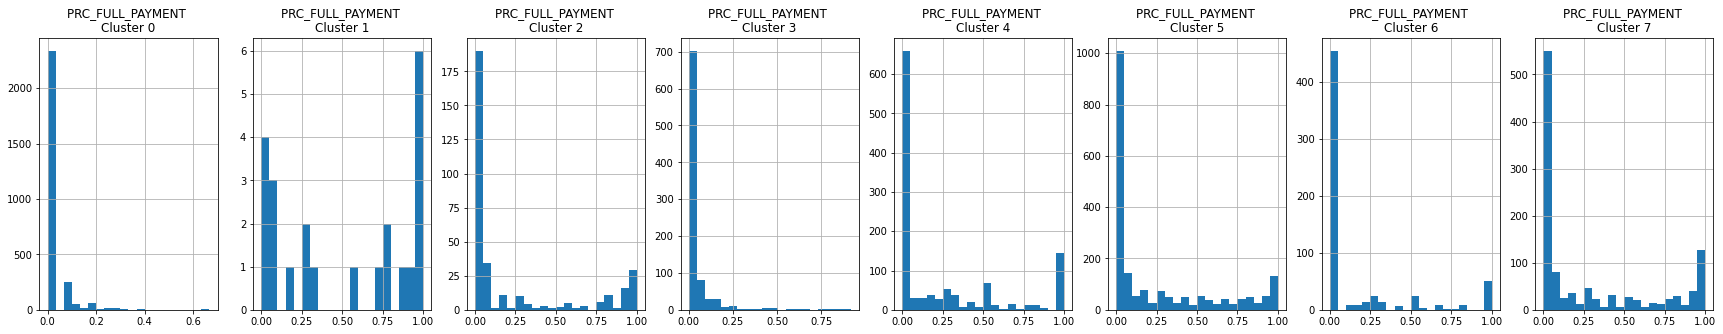

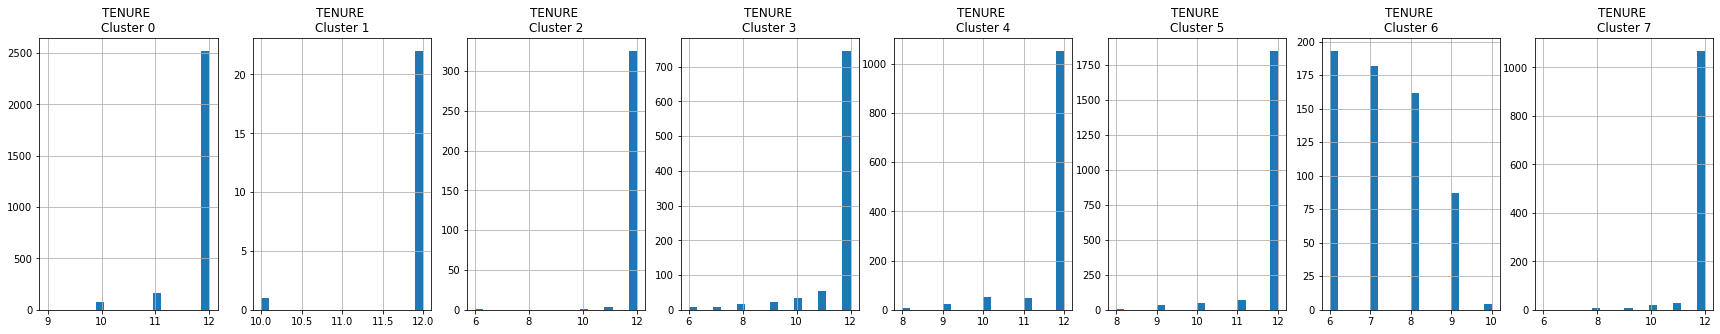

In [35]:
# Plotting histogram for all the clusters

for i in customerdata_df.columns:
  plt.figure(figsize = (30, 5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    cluster = customerdata_df_cluster[customerdata_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))

🔵 Applying Principal Component Analysis (PCA)

In [36]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(customerdata_df_scaled)
principal_comp

array([[-1.68222026, -1.07645129],
       [-1.13829262,  2.50648139],
       [ 0.96968058, -0.38352819],
       ...,
       [-0.92620388, -1.81078686],
       [-2.33655087, -0.65796424],
       [-0.55642203, -0.40046498]])

In [37]:
# Create dataframe with two components

pca_df = pd.DataFrame(data = principal_comp, columns = ['pca_1', 'pca_2'])
pca_df.head()

,pca_1,pca_2
0,-1.682220,-1.076451
1,-1.138293,2.506481
2,0.969681,-0.383528
3,-0.873629,0.043162
4,-1.599433,-0.688580


In [38]:
# Concatinate the cluster labels with the dataframe

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis =1)

In [39]:
pca_df.head()

,pca_1,pca_2,cluster
0,-1.682220,-1.076451,0
1,-1.138293,2.506481,3
2,0.969681,-0.383528,7
3,-0.873629,0.043162,0
4,-1.599433,-0.688580,0


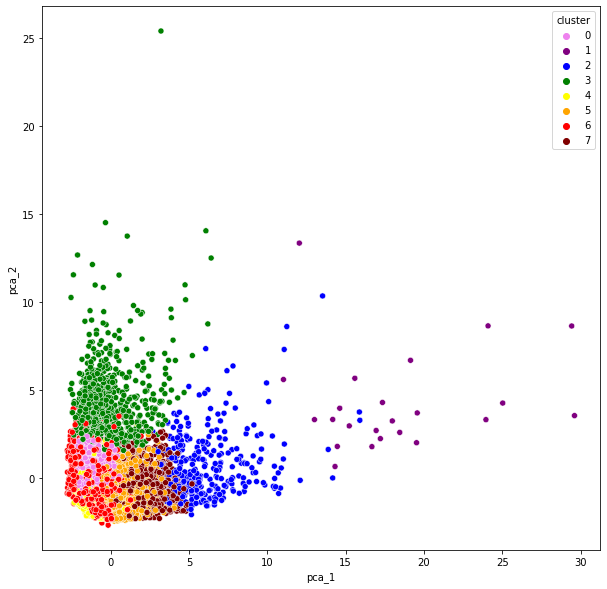

In [40]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca_1', y = 'pca_2', hue = 'cluster', data = pca_df, palette = ['violet', 'purple', 'blue', 'green', 'yellow', 'orange', 'red', 'maroon'] ) 

🟢 Performing dimensionality reduction using autoencoders

In [43]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform # draws samples from truncated normal distribution
from keras.optimizers import SGD

In [44]:
input_df = Input(shape = (17,))

In [46]:
x = Dense(7, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

# Encoder layer

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense (2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense (500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

# Decoder layer

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)


#Autoencoder

autoencoder = Model(input_df, decoded)

#Encoder

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [47]:
customerdata_df_scaled.shape

(8950, 17)

In [48]:
autoencoder.fit(customerdata_df_scaled, customerdata_df_scaled, batch_size = 120, epochs = 25, verbose = 1)

Epoch 1/25
75/75 [==============================] - 5s 51ms/step - loss: 0.5179
Epoch 2/25
75/75 [==============================] - 4s 47ms/step - loss: 0.2794
Epoch 3/25
75/75 [==============================] - 3s 41ms/step - loss: 0.2150
Epoch 4/25
75/75 [==============================] - 3s 42ms/step - loss: 0.1810
Epoch 5/25
75/75 [==============================] - 3s 41ms/step - loss: 0.1610
Epoch 6/25
75/75 [==============================] - 3s 42ms/step - loss: 0.1463
Epoch 7/25
75/75 [==============================] - 3s 42ms/step - loss: 0.1348
Epoch 8/25
75/75 [==============================] - 3s 42ms/step - loss: 0.1178
Epoch 9/25
75/75 [==============================] - 3s 42ms/step - loss: 0.1104
Epoch 10/25
75/75 [==============================] - 3s 41ms/step - loss: 0.1030
Epoch 11/25
75/75 [==============================] - 3s 41ms/step - loss: 0.1087
Epoch 12/25
75/75 [==============================] - 3s 41ms/step - loss: 0.0967
Epoch 13/25
75/75 [==================

In [49]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_1 (Dense)             (None, 7)                 126       
                                                                 
 dense_2 (Dense)             (None, 500)               4000      
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_5 (Dense)             (None, 10)                20010     
                                                                 
 dense_6 (Dense)             (None, 2000)              22000 

In [50]:
prediction = encoder.predict(customerdata_df_scaled)

prediction.shape

280/280 [==============================] - 1s 5ms/step


(8950, 10)

In [51]:
# Finding the optimal number of clusters

score_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i )
  kmeans.fit(prediction)
  score_2.append(kmeans.inertia_)

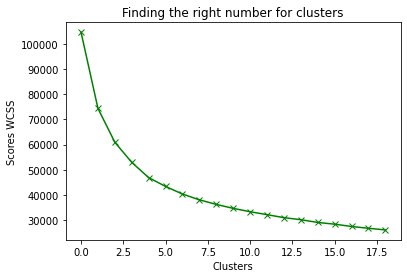

In [52]:
plt.plot(score_2, 'gx-')
plt.title("Finding the right number for clusters")
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

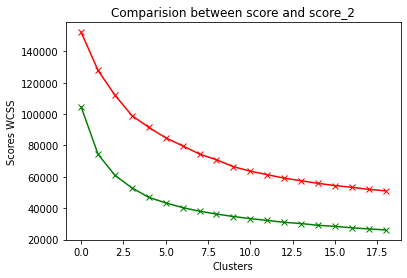

In [54]:
# Comparision between score and score_2

plt.plot(score, 'bx-', color = 'r')
plt.plot(score_2, 'bx-', color = 'g')
plt.title("Comparision between score and score_2")
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

In [59]:
kmeans = KMeans(4)
kmeans.fit(prediction)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(customerdata_df_scaled)

In [61]:
df_cluster = pd.concat([customerdata_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [62]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(prediction)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca_1','pca_2'])
pca_df.head()

,pca_1,pca_2
0,-2.091719,-0.256987
1,1.021523,1.930157
2,0.094887,-0.414461
3,0.052374,0.221971
4,-1.961474,-0.011000


In [63]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca_1,pca_2,cluster
0,-2.091719,-0.256987,0
1,1.021523,1.930157,1
2,0.094887,-0.414461,1
3,0.052374,0.221971,1
4,-1.961474,-0.011000,0


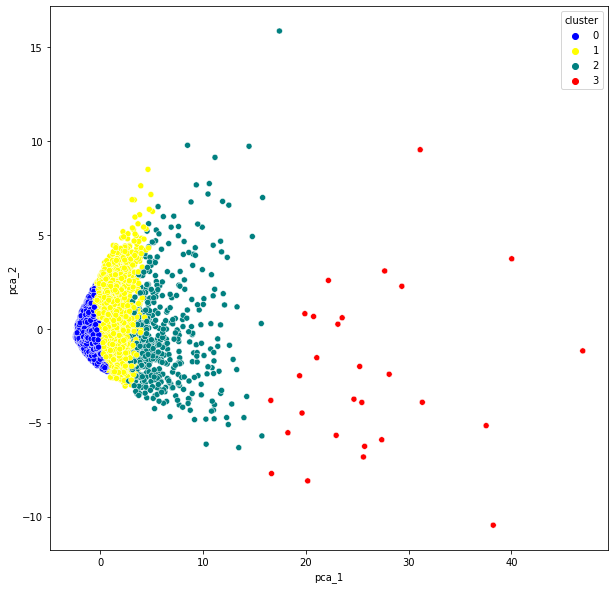

In [66]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca_1", y="pca_2", hue = "cluster", data = pca_df, palette =['blue','yellow','teal','red'])
plt.show()